In [53]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [145]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [139]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [142]:
# Find the most recent date in the data set.
session.query(measure.date).order_by(measure.date.desc()).first()

('2017-08-23',)

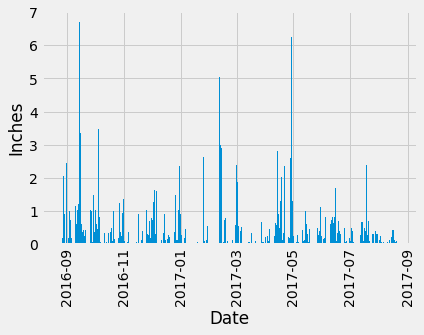

In [78]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_filt = dt.date(2016, 8, 23)
date_prcp = session.query(measure.date, measure.prcp).filter(measure.date >= date_filt).all()
date_prcp
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(date_prcp, columns = ["Date", "Precipitation"])
df['Date'] = pd.to_datetime(df['Date'])
# Sort the dataframe by date
df = df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
#trips_duration.duration.nlargest(n=10).plot(kind='bar' ,title='longest trips')
plt.bar(df["Date"], df["Precipitation"])
plt.xticks(rotation = 90)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show()

In [73]:
df['Date'] = pd.to_datetime(df['Date'])

In [79]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [137]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [96]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measure.station, func.count(measure.station)).group_by(measure.station).\
              order_by(func.count(measure.station).desc())\
              .all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [125]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
df = pd.DataFrame(session.query(measure.tobs).filter(measure.station == 'USC00519281').all(), columns = ["TOBS"])

print(f"Lowest Temperature: {df.min()}\n\nMaximum Temperature: {df.max()}\n\nAverage Temperature: {df.mean()}")

Lowest Temperature: TOBS    54.0
dtype: float64

Maximum Temperature: TOBS    85.0
dtype: float64

Average Temperature: TOBS    71.663781
dtype: float64


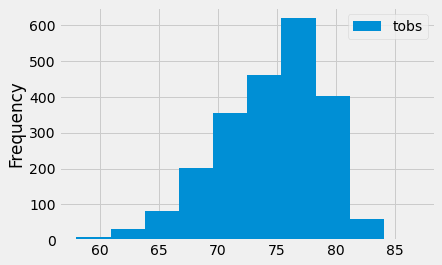

In [134]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df = pd.DataFrame(session.query(measure.tobs).filter(measure.date >= date_filt).all(), columns = ["TOBs"])
plt.hist(df, label = "tobs")
plt.legend()
plt.ylabel("Frequency")
plt.show()

# Close session

In [143]:
# Close Session
session.close()